In [70]:
# Importing standard library packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Image
import io
import os
import reportlab
from Bio import SeqIO
from Bio.KEGG import REST
from Bio.KEGG.KGML import KGML_parser
from Bio.Graphics.KGML_vis import KGMLCanvas

In [ ]:
!pip install reportlab

In [71]:
# A bit of code that will help us display the PDF output
def PDF(filename):
    return HTML('<iframe src=%s width=700 height=350></iframe>' % filename)

# Some code to return a Pandas dataframe, given tabular text
def to_df(result):
    return pd.read_table(io.StringIO(result), header=None)

import json
with open('ko1000.json', 'r') as f:
    data_json = json.load(f)
# data_json['children'][6]['children'][0]['children'][1]['children'][1]['name']

In [72]:
# Perform the query to check if KEGG is linked
result = REST.kegg_info("kegg").read()


kegg             Kyoto Encyclopedia of Genes and Genomes
kegg             Release 96.0+/12-14, Dec 20
                 Kanehisa Laboratories
                 pathway     758,081 entries
                 brite       264,435 entries
                 module          512 entries
                 orthology    23,916 entries
                 genome        7,256 entries
                 genes     33,082,417 entries
                 compound     18,749 entries
                 glycan       11,042 entries
                 reaction     11,467 entries
                 rclass        3,168 entries
                 enzyme        7,787 entries
                 network       1,442 entries
                 variant         441 entries
                 disease       2,456 entries
                 drug         11,370 entries
                 dgroup        2,298 entries
                 environ         864 entries



In [ ]:
#Loading EC numbers for Lactobacillus Crispatus into DataFrame named LactCrispatus
LactCrispatus= pd.read_csv("PROKKA_Lactobacillus_Crispatus.csv")
LactCrispatus.columns= ['EC_numbers']
#Splitting EC_numbers
LactCrispatus[['First','Last']] = LactCrispatus.EC_numbers.str.split("=",expand=True)
print("LLactobacillus Crispatus")
print(LactCrispatus)


#Loading EC numbers for Metagenomic reads in Mid Vagina into DataFrame na
mid_vag= pd.read_csv("PROKKA_Mid_Vag.csv")
mid_vag.columns= ['EC_numbers']
mid_vag[['First','Last']] = mid_vag.EC_numbers.str.split("=",expand=True)
print("Mid Vaginal Sample")
print(mid_vag)

#Loading EC numbers for Gardnerella Vaginalis into DataFrame named GardVaginalis
GardVaginalis= pd.read_csv("PROKKA_GradVaginalis.csv")
GardVaginalis.columns= ['EC_numbers']
GardVaginalis[['First','Last']] = GardVaginalis.EC_numbers.str.split("=",expand=True)
print("Gardnerella Vaginalis")
print(GardVaginalis)


#Loading EC numbers for Metagenomic reads in BV infected Sample into DataFrame na
infected= pd.read_csv("PROKKA_infected.csv")
infected.columns= ['EC_numbers']
infected[['First','Last']] = infected.EC_numbers.str.split("=",expand=True)
print("BV Infected Sample")
print(infected)

#Loading EC numbers for Metagenomic reads in Vaginal Introitus into DataFrame named Vag_Int
Vag_Int= pd.read_csv("PROKKA_Vag_Int.csv")
Vag_Int.columns= ['EC_numbers']
Vag_Int[['First','Last']] = Vag_Int.EC_numbers.str.split("=",expand=True)
print("Vaginal Introitus sample")
print(Vag_Int)

In [ ]:
infected[['1','2','3','4']] = infected.Last.str.split(".",expand=True)
print(infected)

Vag_Int[['1','2','3','4']] = Vag_Int.Last.str.split(".",expand=True)
print(Vag_Int)

LactCrispatus[['1','2','3','4']] = LactCrispatus.Last.str.split(".",expand=True)
print(LactCrispatus)

GardVaginalis[['1','2','3','4']] = GardVaginalis.Last.str.split(".",expand=True)
print(GardVaginalis)

mid_vag[['1','2','3','4']] = mid_vag.Last.str.split(".",expand=True)
print(mid_vag)

In [222]:
mid_vag

,EC_numbers,First,Last,Enzyme_Name,1,2,3,4
0,eC_number=5.4.99.12,eC_number,5.4.99.12,tRNA pseudouridine38-40 synthase;,5,4,99,12
1,eC_number=2.7.1.33,eC_number,2.7.1.33,pantothenate kinase;,2,7,1,33
2,eC_number=2.7.1.11,eC_number,2.7.1.11,6-phosphofructokinase;,2,7,1,11
3,eC_number=3.1.3.104,eC_number,3.1.3.104,5-amino-6-(5-phospho-D-ribitylamino)uracil pho...,3,1,3,104
4,eC_number=2.1.1.226,eC_number,2.1.1.226,23S rRNA (cytidine1920-2'-O)-methyltransferase;,2,1,1,226
...,...,...,...,...,...,...,...,...
449,eC_number=3.5.1.18,eC_number,3.5.1.18,succinyl-diaminopimelate desuccinylase;,3,5,1,18
450,eC_number=3.6.3.-,eC_number,3.6.3.-,NaN,3,6,3,-
451,eC_number=3.4.13.9,eC_number,3.4.13.9,Xaa-Pro dipeptidase;,3,4,13,9
452,eC_number=7.3.2.1,eC_number,7.3.2.1,ABC-type phosphate transporter;,7,3,2,1


In [ ]:
strMatchRe = "NAME.*"
for index, row in mid_vag.iterrows():
    temp = ''
    curr_ec_number = row['Last']
    print(curr_ec_number)
    if "-" in curr_ec_number:
        continue
    result = REST.kegg_get(str(curr_ec_number)).read()
    temp = re.findall(strMatchRe, result)
    tempVar = temp[0]
    temp = tempVar.replace("NAME        ","")
    print(temp)
#     row['Enzyme_Name'] = temp
    mid_vag.loc[index,'Enzyme_Name'] = temp
    curr_ec_number = ''
mid_vag

In [ ]:
strMatchRe = "NAME.*"
for index, row in infected.iterrows():
    temp = ''
    curr_ec_number = row['Last']
    print(curr_ec_number)
    if "-" in curr_ec_number:
        continue
    result = REST.kegg_get(str(curr_ec_number)).read()
    temp = re.findall(strMatchRe, result)
    tempVar = temp[0]
    temp = tempVar.replace("NAME        ","")
    print(temp)
#     row['Enzyme_Name'] = temp
    infected.loc[index,'Enzyme_Name'] = temp
    curr_ec_number = ''
infected

In [226]:
infected

,EC_numbers,First,Last,1,2,3,4,Enzyme_Name
0,eC_number=2.8.1.7,eC_number,2.8.1.7,2,8,1,7,cysteine desulfurase;
1,eC_number=2.1.1.-,eC_number,2.1.1.-,2,1,1,-,NaN
2,eC_number=5.3.1.34,eC_number,5.3.1.34,5,3,1,34,D-erythrulose 4-phosphate isomerase;
3,eC_number=3.4.11.-,eC_number,3.4.11.-,3,4,11,-,NaN
4,eC_number=1.6.99.3,eC_number,1.6.99.3,1,6,99,3,Deleted entry
...,...,...,...,...,...,...,...,...
441,eC_number=3.6.5.-,eC_number,3.6.5.-,3,6,5,-,NaN
442,eC_number=6.1.1.17,eC_number,6.1.1.17,6,1,1,17,glutamate---tRNA ligase;
443,eC_number=3.1.1.96,eC_number,3.1.1.96,3,1,1,96,D-aminoacyl-tRNA deacylase;
444,eC_number=3.4.13.18,eC_number,3.4.13.18,3,4,13,18,cytosol nonspecific dipeptidase;


In [ ]:
# Linking EC_numbers from our DataFrame to Enzyme Name in KEGG

strMatchRe = "NAME.*"
for index, row in Vag_Int.iterrows():
    temp = ''
    curr_ec_number = row['Last']
    print(curr_ec_number)
    if "-" in curr_ec_number:
        continue
    result = REST.kegg_get(str(curr_ec_number)).read()
    temp = re.findall(strMatchRe, result)
    tempVar = temp[0]
    temp = tempVar.replace("NAME        ","")
    print(temp)
    row['Enzyme_Name'] = temp
    curr_ec_number = ''
Vag_Int

In [ ]:
# Linking EC_numbers from our DataFrame to Enzyme Name in KEGG

strMatchRe = "NAME.*"
for index, row in infected.iterrows():
    temp = ''
    curr_ec_number = row['Last']
    print(curr_ec_number)
    if "-" in curr_ec_number:
        continue
    result = REST.kegg_get(str(curr_ec_number)).read()
    temp = re.findall(strMatchRe, result)
    tempVar = temp[0]
    temp = tempVar.replace("NAME        ","")
    print(temp)
    row['Enzyme_Name'] = temp
    curr_ec_number = ''
infected

In [227]:
infected

,EC_numbers,First,Last,1,2,3,4,Enzyme_Name
0,eC_number=2.8.1.7,eC_number,2.8.1.7,2,8,1,7,cysteine desulfurase;
1,eC_number=2.1.1.-,eC_number,2.1.1.-,2,1,1,-,NaN
2,eC_number=5.3.1.34,eC_number,5.3.1.34,5,3,1,34,D-erythrulose 4-phosphate isomerase;
3,eC_number=3.4.11.-,eC_number,3.4.11.-,3,4,11,-,NaN
4,eC_number=1.6.99.3,eC_number,1.6.99.3,1,6,99,3,Deleted entry
...,...,...,...,...,...,...,...,...
441,eC_number=3.6.5.-,eC_number,3.6.5.-,3,6,5,-,NaN
442,eC_number=6.1.1.17,eC_number,6.1.1.17,6,1,1,17,glutamate---tRNA ligase;
443,eC_number=3.1.1.96,eC_number,3.1.1.96,3,1,1,96,D-aminoacyl-tRNA deacylase;
444,eC_number=3.4.13.18,eC_number,3.4.13.18,3,4,13,18,cytosol nonspecific dipeptidase;


In [ ]:
strMatchRe = "NAME.*"
for index, row in GardVaginalis.iterrows():
    temp = ''
    curr_ec_number = row['Last']
    print(curr_ec_number)
    if "-" in curr_ec_number:
        continue
    result = REST.kegg_get(str(curr_ec_number)).read()
    temp = re.findall(strMatchRe, result)
    tempVar = temp[0]
    temp = tempVar.replace("NAME        ","")
    print(temp)
#     row['Enzyme_Name'] = temp
    GardVaginalis.loc[index,'Enzyme_Name'] = temp
    curr_ec_number = ''
GardVaginalis

In [ ]:
strMatchRe = "NAME.*"
for index, row in LactCrispatus.iterrows():
    temp = ''
    curr_ec_number = row['Last']
    print(curr_ec_number)
    if "-" in curr_ec_number:
        continue
    result = REST.kegg_get(str(curr_ec_number)).read()
    temp = re.findall(strMatchRe, result)
    tempVar = temp[0]
    temp = tempVar.replace("NAME        ","")
    print(temp)
#     row['Enzyme_Name'] = temp
    LactCrispatus.loc[index,'Enzyme_Name'] = temp
    curr_ec_number = ''
LactCrispatus

In [ ]:
strMatchRe = "NAME.*"
for index, row in Vag_Int.iterrows():
    temp = ''
    curr_ec_number = row['Last']
    print(curr_ec_number)
    if "-" in curr_ec_number:
        continue
    result = REST.kegg_get(str(curr_ec_number)).read()
    temp = re.findall(strMatchRe, result)
    tempVar = temp[0]
    temp = tempVar.replace("NAME        ","")
    print(temp)
#     row['Enzyme_Name'] = temp
    Vag_Int.loc[index,'Enzyme_Name'] = temp
    curr_ec_number = ''
Vag_Int

In [240]:
plot_infected= infected.groupby(['1']).size().reset_index(name="count_1")
plot_infected

,1,count_1
0,1,38
1,2,147
2,3,120
3,4,25
4,5,29
5,6,62
6,7,25


In [241]:
plot_LactCrispatus= LactCrispatus.groupby(['1']).size().reset_index(name="count_1")
plot_LactCrispatus

,1,count_1
0,1,62
1,2,205
2,3,211
3,4,33
4,5,42
5,6,53
6,7,34


In [242]:
plot_Vag_Int= Vag_Int.groupby(['1']).size().reset_index(name="count_1")
plot_Vag_Int

,1,count_1
0,1,2
1,2,10
2,3,4
3,4,2
4,5,1


In [243]:
plot_Gard_Vaginalis= GardVaginalis.groupby(['1']).size().reset_index(name="count_1")
plot_Gard_Vaginalis

,1,count_1
0,1,43
1,2,142
2,3,117
3,4,27
4,5,36
5,6,53
6,7,26


In [244]:
plot_mid_vag= mid_vag.groupby(['1']).size().reset_index(name="count_1")
plot_mid_vag

,1,count_1
0,1,35
1,2,158
2,3,142
3,4,24
4,5,34
5,6,44
6,7,17


In [245]:
df_Array= [plot_infected, plot_Vag_Int, plot_LactCrispatus, plot_Gard_Vaginalis, plot_mid_vag]

In [246]:
# for frame in df_Array:
#     plt.bar(frame['1'],frame['count_1'])
df_res=pd.concat(df_Array)
df_result = pd.merge(plot_infected, plot_Vag_Int, on='1',how='left')
df_result = pd.merge(df_result, plot_LactCrispatus, on='1',how='left')
df_result = pd.merge(df_result, plot_Gard_Vaginalis, on='1',how='left')
df_result = pd.merge(df_result, plot_mid_vag, on='1',how='left')
df_result.replace(np.nan, 0)
#df_result.columns=['fdf','Infected', 'Vag Int', 'Lact Crispatus', 'Gard Vaginalis']

,1,count_1_x,count_1_y,count_1_x,count_1_y,count_1
0,1,38,2.0,62,43,35
1,2,147,10.0,205,142,158
2,3,120,4.0,211,117,142
3,4,25,2.0,33,27,24
4,5,29,1.0,42,36,34
5,6,62,0.0,53,53,44
6,7,25,0.0,34,26,17


In [247]:
df_result.columns=['EC Category','BV Infected', 'Vaginal Introitus', 'Lactobacillus Crispatus', 'Gardnerella Vaginalis', 'Mid Vagina']
df_result["EC Category"]=['EC 1 Oxidoreductases','EC 2 Transferases', 'EC 3 Hydrolases', 'EC 4 Lyases', 'EC 5 Isomerases', 'EC 6 Liases','EC 7 Translocases']
df_result

,EC Category,BV Infected,Vaginal Introitus,Lactobacillus Crispatus,Gardnerella Vaginalis,Mid Vagina
0,EC 1 Oxidoreductases,38,2.0,62,43,35
1,EC 2 Transferases,147,10.0,205,142,158
2,EC 3 Hydrolases,120,4.0,211,117,142
3,EC 4 Lyases,25,2.0,33,27,24
4,EC 5 Isomerases,29,1.0,42,36,34
5,EC 6 Liases,62,NaN,53,53,44
6,EC 7 Translocases,25,NaN,34,26,17


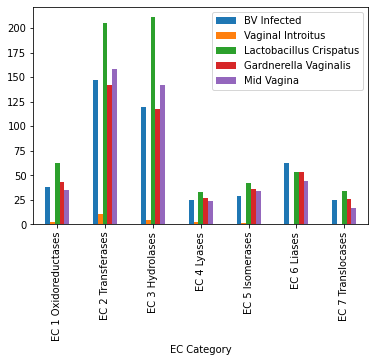

In [257]:
df_result.plot(x='EC Category', y=['BV Infected', 'Vaginal Introitus', 'Lactobacillus Crispatus', 'Gardnerella Vaginalis', 'Mid Vagina'], kind="bar")
plt.savefig('EC_Main.png')

<AxesSubplot:xlabel='EC Category'>

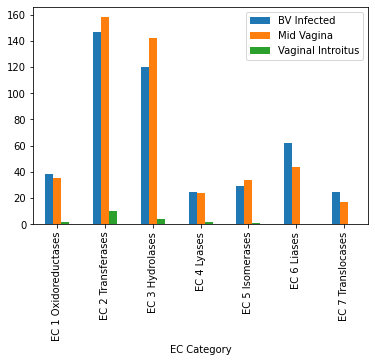

In [252]:
df_result.plot(x="EC Category", y=['BV Infected', 'Mid Vagina', 'Vaginal Introitus'], kind="bar")

<AxesSubplot:xlabel='EC Category'>

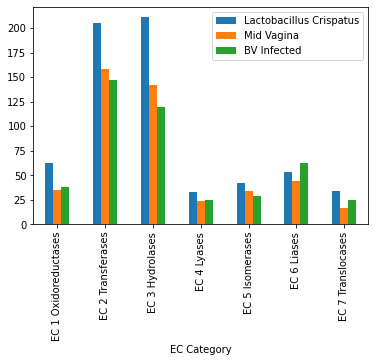

In [262]:
df_result.plot(x="EC Category", y=[ 'Lactobacillus Crispatus', 'Mid Vagina', 'BV Infected'], kind="bar")

<AxesSubplot:xlabel='EC Category'>

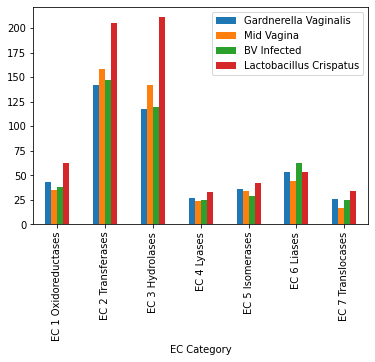

In [264]:
df_result.plot(x="EC Category", y=[ 'Gardnerella Vaginalis', 'Mid Vagina', 'BV Infected', 'Lactobacillus Crispatus'], kind="bar")

In [ ]:
Vag_Int_pie_plot=

In [156]:
new_vag_int_plot = Vag_Int['Enzyme_Name'].value_counts(dropna=False)

<AxesSubplot:ylabel='Enzyme_Name'>

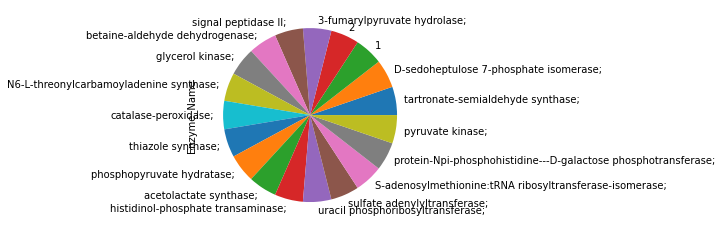

In [162]:
new_vag_int_plot.plot(kind="pie")

In [196]:
mid_vag_ec1 = mid_vag.loc[mid_vag['1'] == '1']
mid_vag_ec1
# mid_vag_ec1_plot = mid_vag_ec1['Enzyme_Name'].value_counts(dropna=False)
mid_vag_ec1_plot = mid_vag_ec1.groupby('Enzyme_Name').count()
mid_vag_ec1_plot

,EC_numbers,First,Last,1,2,3,4
Enzyme_Name,,,,,,,
,2,2,2,2,2,2,2
3-oxoacyl-[acyl-carrier-protein] reductase;,1,1,1,1,1,1,1
7-cyano-7-deazaguanine synthase;,1,1,1,1,1,1,1
ABC-type D-galactose transporter;,1,1,1,1,1,1,1
D-aminoacyl-tRNA deacylase;,1,1,1,1,1,1,1
DNA helicase;,1,1,1,1,1,1,1
DNA-directed DNA polymerase;,1,1,1,1,1,1,1
L-lactate dehydrogenase;,1,1,1,1,1,1,1
P-type Mg2+ transporter;,1,1,1,1,1,1,1


In [254]:
df_result


,EC Category,BV Infected,Vaginal Introitus,Lactobacillus Crispatus,Gardnerella Vaginalis,Mid Vagina
0,EC 1 Oxidoreductases,38,2.0,62,43,35
1,EC 2 Transferases,147,10.0,205,142,158
2,EC 3 Hydrolases,120,4.0,211,117,142
3,EC 4 Lyases,25,2.0,33,27,24
4,EC 5 Isomerases,29,1.0,42,36,34
5,EC 6 Liases,62,NaN,53,53,44
6,EC 7 Translocases,25,NaN,34,26,17


In [266]:
infected.to_csv("BV_Infected.csv")

In [267]:
LactCrispatus.to_csv("Lactobacillus_Bacillus.csv")

In [268]:
GardVaginalis.to_csv("Gardnerella_Vaginalis.csv")

In [269]:
Vag_Int.to_csv("Vaginal_Introitus.csv")

In [271]:
mid_vag.to_csv("Mid_Vagina.csv")